In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
train_path = "diabetic-ratino/train"
valid_path = "diabetic-ratino/test"

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [7]:
# Model is already trained, don't train existing weights again
for layer in vgg.layers:
    layer.trainable = False

In [8]:
# useful for getting number of classes of dataset
folders = glob('diabetic-ratino/train/*')

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("diabetic-ratino/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("diabetic-ratino/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2930 images belonging to 2 classes.
Found 732 images belonging to 2 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs = 30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
92/92 [==============================] - 49s 440ms/step - loss: 0.6366 - accuracy: 0.7745 - val_loss: 0.2517 - val_accuracy: 0.9208
Epoch 2/30
92/92 [==============================] - 39s 422ms/step - loss: 0.1943 - accuracy: 0.9321 - val_loss: 0.1663 - val_accuracy: 0.9385
Epoch 3/30
92/92 [==============================] - 39s 420ms/step - loss: 0.2024 - accuracy: 0.9334 - val_loss: 0.1832 - val_accuracy: 0.9440
Epoch 4/30
92/92 [==============================] - 39s 420ms/step - loss: 0.1818 - accuracy: 0.9361 - val_loss: 0.2358 - val_accuracy: 0.8948
Epoch 5/30
92/92 [==============================] - 39s 422ms/step - loss: 0.1659 - accuracy: 0.9428 - val_loss: 0.1433 - val_accuracy: 0.9522
Epoch 6/30
92/92 [==============================] - 39s 425ms/step - loss: 0.1667 - accuracy: 0.9420 - val_loss: 0.1486 - val_accuracy: 0.9522
Epoch 7/30
92/92 [==============================] - 39s 419ms/step - loss: 0.1589 - accuracy: 0.9492 - val_loss: 0.1330 - val_accuracy: 0.9481

In [15]:
from keras.models import load_model
model.save('diabetic-ratino-model.h5')

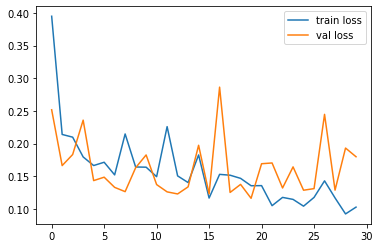

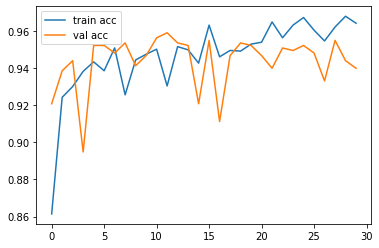

<Figure size 432x288 with 0 Axes>

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')